# Statistics and Machine learning project example

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [42]:
food = pd.read_csv('data/food_consumption.csv')
food.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


Just for exploring it, I am interested in how many countries is the dataset referring to as well as which types of food are considered.

In [43]:
print(f"The dataset contains a total of {food.country.nunique()} different countries")

The dataset contains a total of 130 different countries


In [44]:
food.country.unique()

array(['Argentina', 'Australia', 'Albania', 'Iceland', 'New Zealand',
       'USA', 'Uruguay', 'Luxembourg', 'Brazil', 'Kazakhstan', 'Sweden',
       'Bermuda', 'Denmark', 'Finland', 'Ireland', 'Greece', 'France',
       'Canada', 'Norway', 'Hong Kong SAR. China', 'French Polynesia',
       'Israel', 'Switzerland', 'Netherlands', 'Kuwait', 'United Kingdom',
       'Austria', 'Oman', 'Italy', 'Bahamas', 'Portugal', 'Malta',
       'Armenia', 'Slovenia', 'Chile', 'Venezuela', 'Belgium', 'Germany',
       'Russia', 'Croatia', 'Belarus', 'Spain', 'Paraguay',
       'New Caledonia', 'South Africa', 'Barbados', 'Lithuania', 'Turkey',
       'Estonia', 'Mexico', 'Costa Rica', 'Bolivia', 'Ecuador', 'Panama',
       'Czech Republic', 'Romania', 'Colombia', 'Maldives', 'Cyprus',
       'Serbia', 'United Arab Emirates', 'Algeria', 'Ukraine', 'Pakistan',
       'Swaziland', 'Latvia', 'Bosnia and Herzegovina', 'Fiji',
       'South Korea', 'Poland', 'Saudi Arabia', 'Botswana', 'Macedonia',
       '

In [45]:
food.food_category.unique()

array(['pork', 'poultry', 'beef', 'lamb_goat', 'fish', 'eggs', 'dairy',
       'wheat', 'rice', 'soybeans', 'nuts'], dtype=object)

1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [46]:
food.groupby('food_category')['consumption'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
wheat,130.0,71.549538,44.191318,2.74,37.0450,69.420,103.3725,197.50
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03


The highest *median value* belongs to **dairy**

Being the dataset so diverse in terms of cultures it is interesting to find out that dairies are on average the most consumed. At the same time, the animal from where the milk might come from, namely cows/beef (if included in the same category) or goats are lower in the rank. It seems logical since an animal can produce a large amount of milk over the course of its lifetime compared to his own weight, hence satisfing larger demand for food in such way compared to eating its meet. That might also be why so many different cultures have their own types of dairies which are also more accessible to the poorer layers of communities than meat is.

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<Axes: xlabel='co2_emission', ylabel='food_category'>

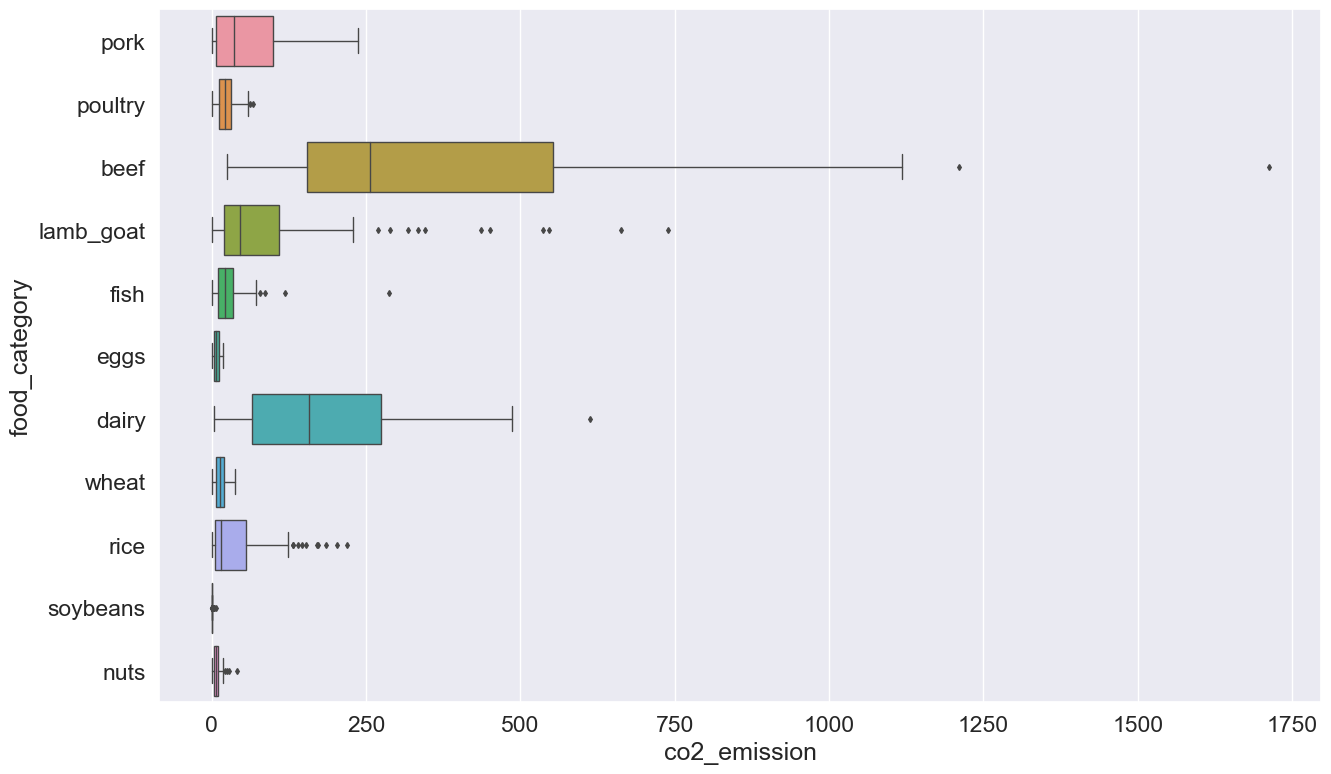

In [47]:
sns.boxplot(data=food, x='co2_emission', y='food_category', fliersize=3, linewidth=1)

It was quite expected! It is weel known that intensive beef farming is causing a certain impact on envirment from co2 emissions.

In the above plot we see that the IQR for beef data distribution across all countries is even larger than the full range for many of other types of food.

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

Beef again!

4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

Before going with the permutation I will set the conditions:
* $\alpha$ = 5% (I will use this for the whole assignment when needed)
* test statistic `u_diff` as difference in means between two groups

And above all:

$$
    \begin{gather}
        H_0: \mu_{poultry} \leq \mu_{fish} \\
        H_1: \mu_{poultry} > \mu_{fish}
    \end{gather}
$$

In other words, in case there is no difference between the two means (poultry and fish consumption) and I sample randomly in two groups, those two group should have the same mean and the difference between them will be distributed around 0, namely what I expect in the null hypothesis H0. Checking where my observed difference lies in this distribution and calculating the p-value we can see then how unusual is to get by chance that difference (how likely is on the null hypothesis H0).

In [48]:
alpha = 0.05
poultry_u = 21.22
fish_u = 17.29
u_diff = poultry_u - fish_u

print(f"My observed difference 'u_diff':\t{u_diff}")

My observed difference 'u_diff':	3.9299999999999997


In [49]:
n = 30000
np.random.seed(1)
mu_diff_samples = []

# I select a subset of my dataset containing only poultry and fish data
df_temp = food[(food['food_category'] == 'poultry')| (food['food_category'] =='fish')].reset_index(drop=True)

# Starting the permutations to collect the u_diff for each samples
for i in range(n): 

    # extract a subsample of 50% of data without replacement
    df_sample1 = df_temp.sample(frac=0.5, replace=False)

    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(df_temp.index) - set(df_sample1.index)

    # create dataframe with other 50% of data
    df_sample2 = df_temp.iloc[list(ix2)]

    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['consumption']) - np.mean(df_sample2['consumption'])
    
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

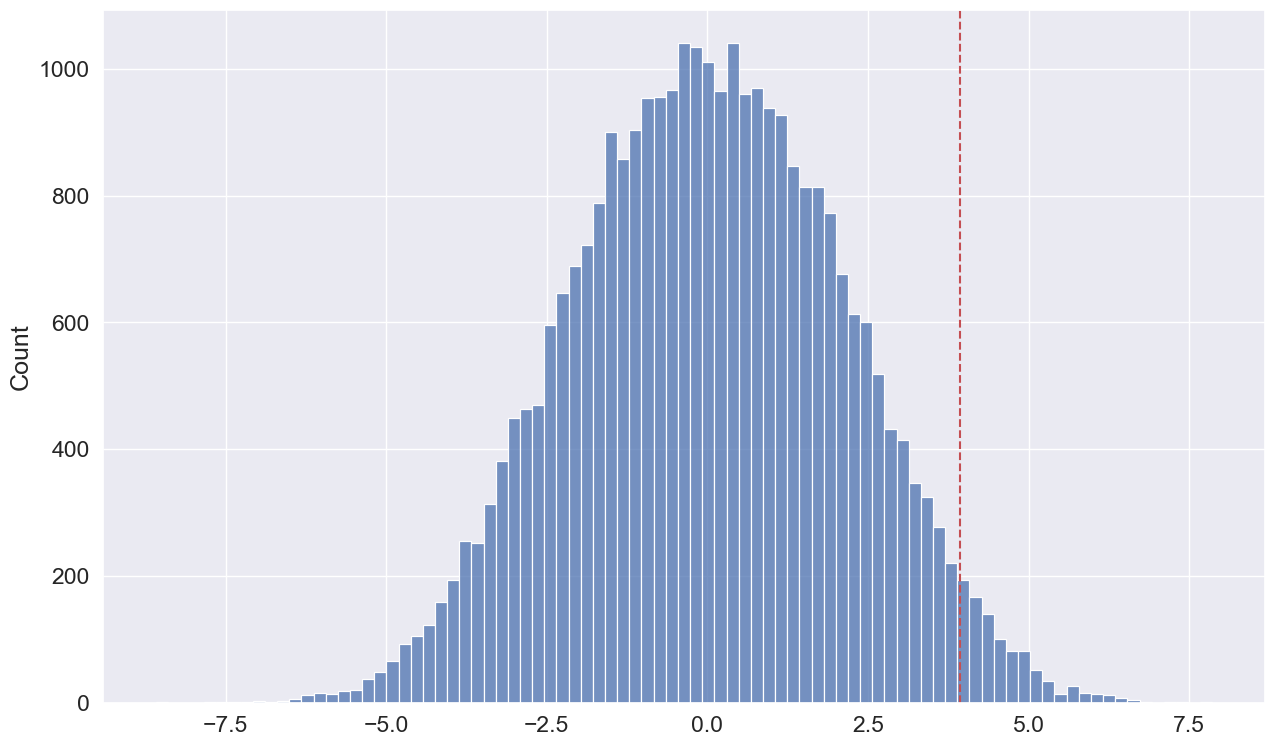

In [50]:
sns.histplot(mu_diff_samples)
plt.axvline(u_diff, 0, 1, color='r', linestyle='--')
plt.show()

In [51]:
print('Values more extreme than observed:', sum([el >= u_diff for el in mu_diff_samples]))
p_value = sum([el > u_diff for el in mu_diff_samples])/n
print('p-value:', p_value)

Values more extreme than observed: 910
p-value: 0.030333333333333334


The p-value suggests that there is a 3% chance that the observed difference comes from random chances. I reject the null hypothesis. The difference I am observing is statistically significant

In [52]:
if p_value < alpha:
    print("p-value <= alpha: H0 REJECTED | the observed result is statistically significant")
else:
    print("p-value > alpha: H0 ACCEPTED | the observed result is not statistically significant")

p-value <= alpha: H0 REJECTED | the observed result is statistically significant


Just for fun check, I want to test if the result obtained above is confirmed by an external library.
I will use *scipy.stats*

In [53]:
from scipy.stats import permutation_test

rng = np.random.default_rng()

def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y,axis=axis)

In [54]:
res = permutation_test((food[food['food_category'] == 'poultry']['consumption'], food[food['food_category'] == 'fish']['consumption']), statistic, vectorized=True,
                       n_resamples=30000, alternative='greater',random_state=rng)

print(f"Observed test-statistic:\t{res.statistic.round(2)}")
print(f"p-value:\t\t\t{res.pvalue.round(2)*100}%")

Observed test-statistic:	3.93
p-value:			3.0%


Both p-value and the observed statistic are the same as the one I calculated.
For completeness I check the distribution as well and I can see that indeed it looks the same.

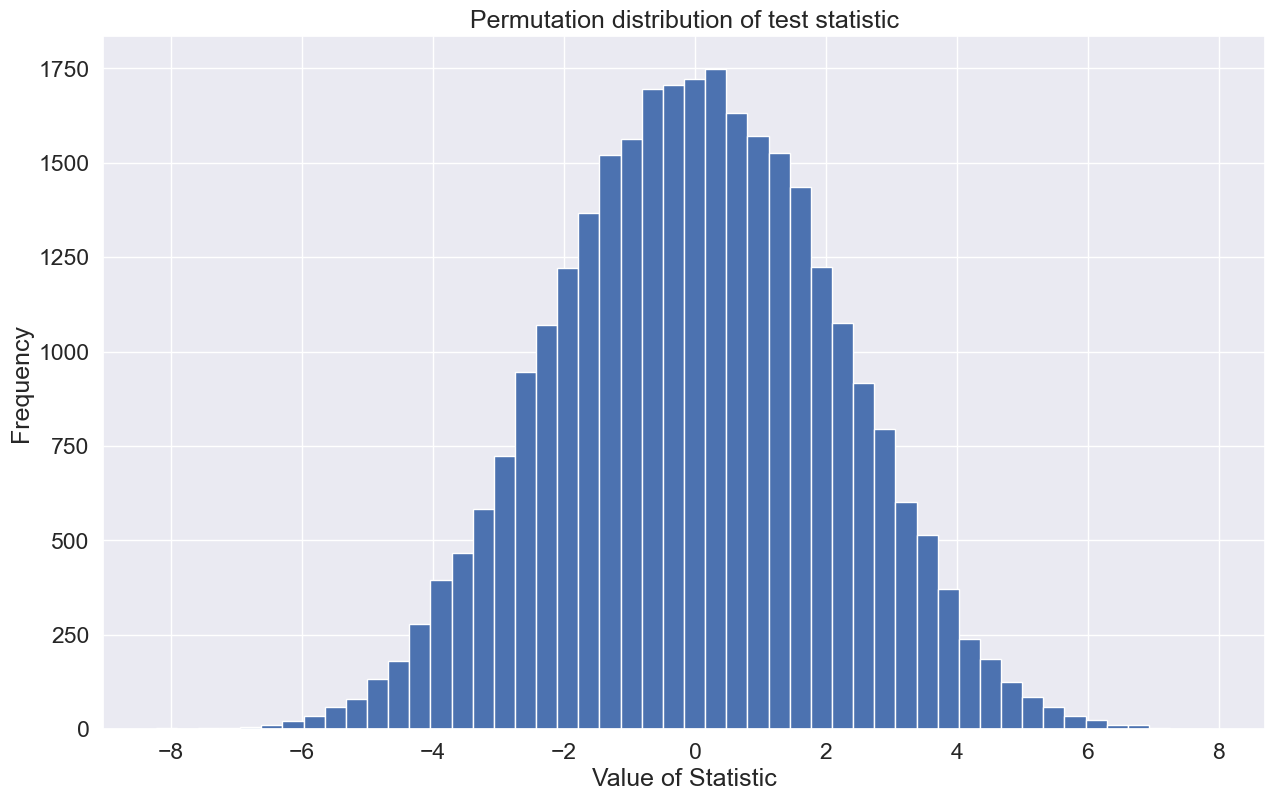

In [55]:
plt.hist(res.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.show()

### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

As usual i will check how the dataset appears as well as its null values and datatypes.

In [56]:
happy = pd.read_csv('data/world_happiness.csv')
happy.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [57]:
print(f"#rows:\t\t{happy.shape[0]}\n#columns:\t{happy.shape[1]}")

#rows:		143
#columns:	8


In [58]:
happy.isna().sum()

country            0
social_support     1
freedom            1
corruption         8
generosity         1
gdp_per_cap        0
life_exp           0
happiness_score    0
dtype: int64

Some null values. I will keep them for the moment.

In [59]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


Data types seems fine.

5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

I will make use of the __kde__ paramenter in seaborn *histplot* to estimate the __pde__ of the distrubution to reduce the error I can commit in the evaluation, since changing the number of bins will change how the distrubutions appears.

<Axes: xlabel='happiness_score', ylabel='Count'>

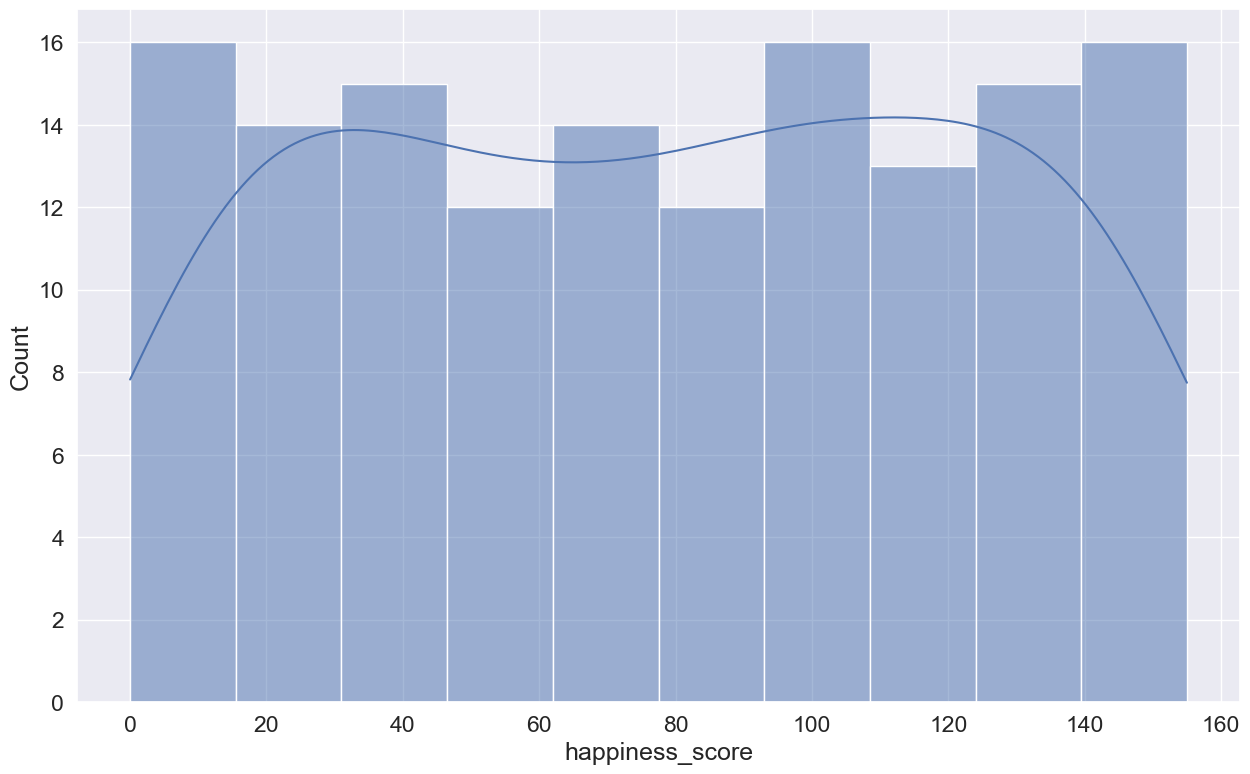

In [60]:
sns.histplot(data=happy, x='happiness_score', bins=10, kde=True)

As the kde suggests even though the distributions seems a slightly higher towards the extreme values i will consider it as uniform-like distribution.
It would be interesting to further investigate in order to see if this slight bimodal behaviour can be separated by grouping the dataset differently. In this moment there might be features grouped at the same level

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

I start with showing the heatmap:

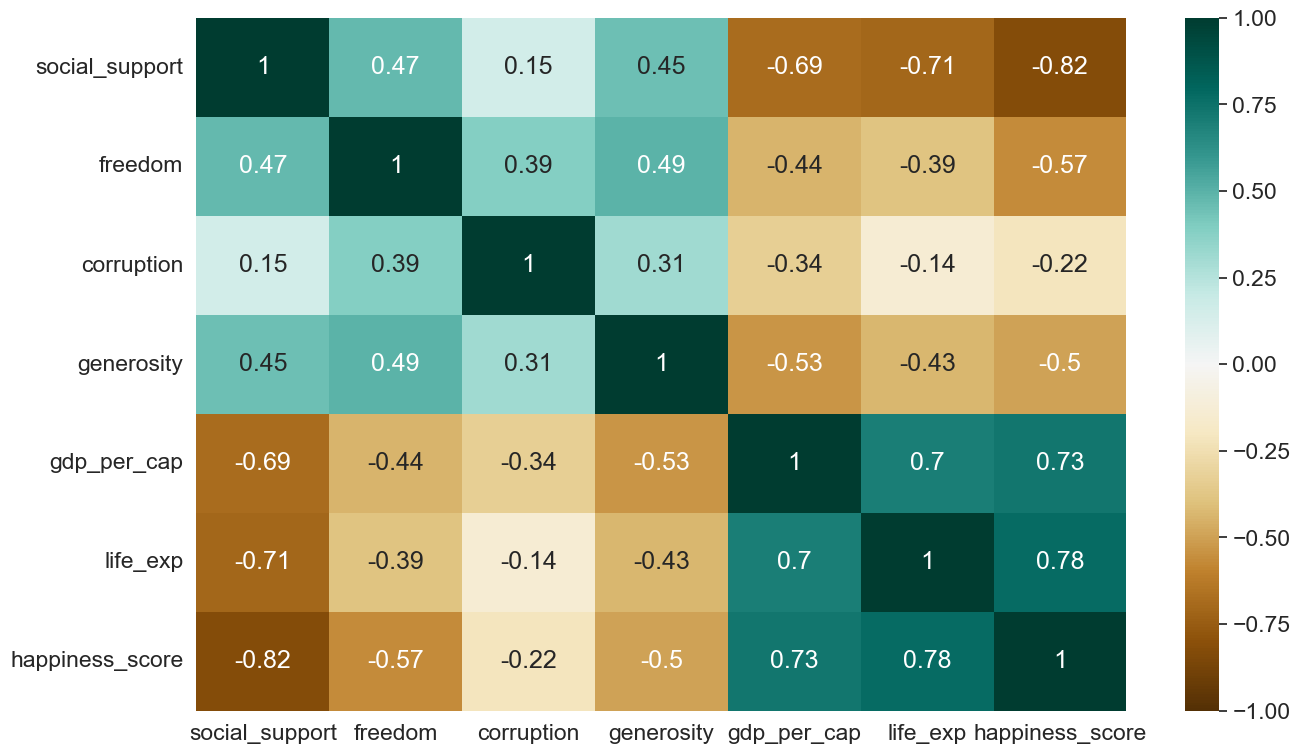

In [61]:
sns.heatmap(happy.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

Now I want to find a numerical way of checking the least correlated variable with **happiness_score**, so that I do not miss anything:

In [62]:
corr_matrix = happy.corr(numeric_only=True)
corr_matrix

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.154848,0.449225,-0.687268,-0.705512,-0.824702
freedom,0.470893,1.000000,0.387234,0.493207,-0.444420,-0.388856,-0.567582
corruption,0.154848,0.387234,1.000000,0.305043,-0.335716,-0.135665,-0.215308
generosity,0.449225,0.493207,0.305043,1.000000,-0.531636,-0.433144,-0.499259
gdp_per_cap,-0.687268,-0.444420,-0.335716,-0.531636,1.000000,0.701955,0.727973
life_exp,-0.705512,-0.388856,-0.135665,-0.433144,0.701955,1.000000,0.780225
happiness_score,-0.824702,-0.567582,-0.215308,-0.499259,0.727973,0.780225,1.000000


In [63]:
np.abs(corr_matrix).unstack()['happiness_score'].sort_values(ascending=True).head(1)

corruption    0.215308
dtype: float64

**Corruption** is the least correlated variable with **happiness_score**. While the least correlated pairs overall is:

In [64]:
np.abs(corr_matrix).unstack().sort_values().head(1)

corruption  life_exp    0.135665
dtype: float64

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [65]:
print(f"# of missing values in 'corruption':\t{happy['corruption'].isna().sum()}")

# of missing values in 'corruption':	8


As seen previously:

In [66]:
happy.isna().sum()

country            0
social_support     1
freedom            1
corruption         8
generosity         1
gdp_per_cap        0
life_exp           0
happiness_score    0
dtype: int64

I can use the *.fillna* dataframe method in order to fill all NaN values with the mean of the respective columns. After that i check that it worked correctly.

In [67]:
happy.fillna(happy.mean(numeric_only=True), inplace=True)
happy.isna().sum()

country            0
social_support     0
freedom            0
corruption         0
generosity         0
gdp_per_cap        0
life_exp           0
happiness_score    0
dtype: int64

8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

In [68]:
import statsmodels.api as sm
Y = happy['happiness_score']    # Target (dependent variable)
X = happy['life_exp']           # Predictor (independent variable)
X = sm.add_constant(data=X)     # add a constant to the model
model = sm.OLS(endog=Y,exog=X)
results = model.fit()

After initialising the necessary libraries and fitting the model i check the results:

In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.59e-30
Time:                        16:39:25   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary above I see some useful insights about my model, namely:

* p-values = 0: regression coefficient is statistically significant, namely changes in the life expectancy are associated with changes in happiness score.
* Cond. No. low: the model does not suffer of multicollinearity. Expected since it has only one independent variable.
* R-squared = 0.6: Only 60% of the variability in the data is explaned by the model input. It is not a good model to me.
* Const coeff =-298: This value as it is (y-intercept) it is not interpretable and therefore makes me think that the linearity can be explained locally but not outside the values observed here

I save the values for slope and intercept into variables that I can use later.

In [70]:
results_as_html = results.summary().tables[1].as_html()
stats_results = pd.read_html(results_as_html, header=0, index_col=0)[0]
stats_results

,coef,std err,t,P>|t|,[0.025,0.975]
const,-298.8710,25.536,-11.704,0.0,-349.355,-248.387
life_exp,5.1021,0.344,14.812,0.0,4.421,5.783


In [71]:
intercept = stats_results.loc['const','coef']
slope = stats_results.loc['life_exp','coef']

print(f"Intercept: {intercept}\nSlope: {slope}")

Intercept: -298.871
Slope: 5.1021


The slope (coef for life_exp) is saying that for every increase of 1 unit of the independent variable, an increase of 5.1 is detected in the dependent variable (happiness_score). This is considered significant since the p-value for life_exp coeff is < $\alpha$ and hence a correlation between the two exists.

I can plot the regression line on the scatterplot that shows the relationship between the two variables.

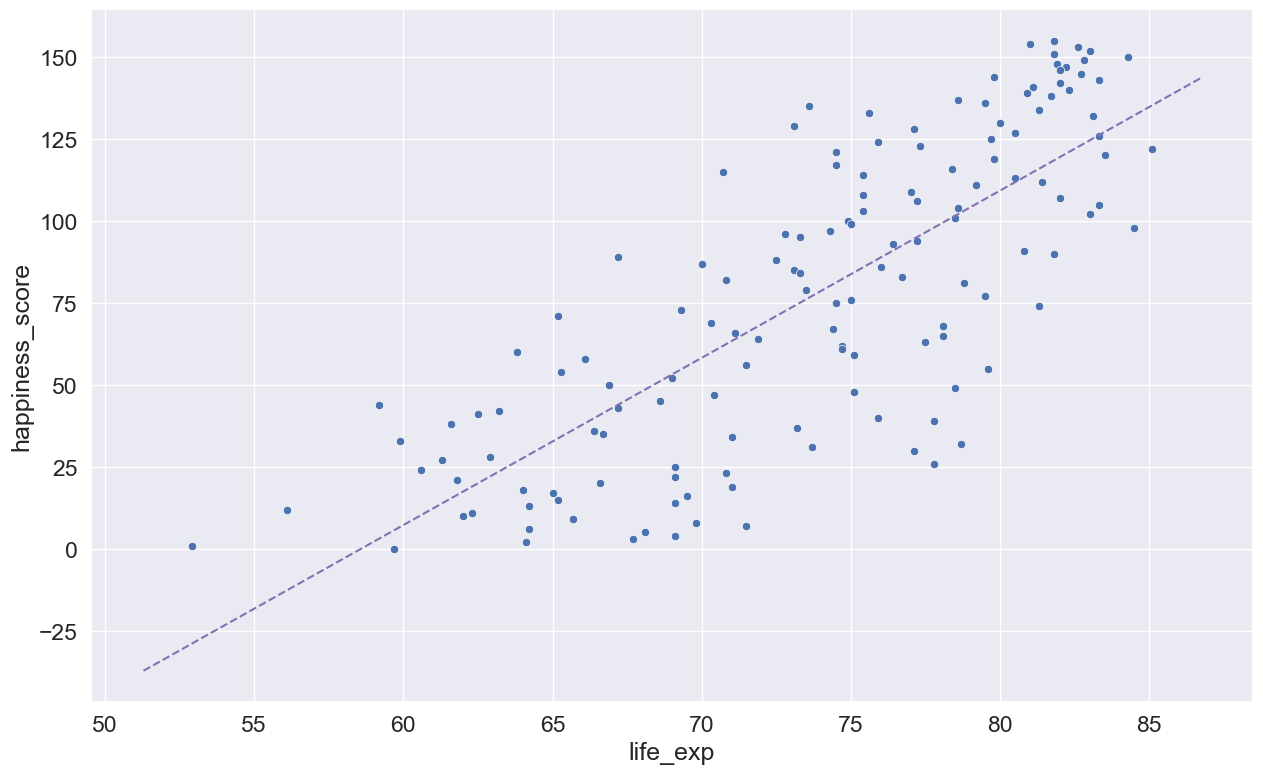

In [72]:
# plot the data points using a scatter plot
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)
axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + slope * x_vals   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='m')   # draw the regression line on top of the scatter plot
plt.show()

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

Load the libraries ad initialize the splitting process:

In [73]:
from sklearn.model_selection import train_test_split

y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
model= sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           3.39e-29
Time:                        16:39:25   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Considering the same thought as the previous question, i see some different reseults here:

* p-values != 0: const and generosity have p-values > 5%.The correlation between dependent and independent variable is not statistically significant for those predictors.
* Cond. No. high: the model suffer from multicollinearity. Predictions might not be necessarily inaccurate but unstable for some inputs.
* R-squared = 0.78: 78% of the variability in the data is explaned by the model input. Not bad but there might be room for improvement.
* Const coeff = 1.37: Not interpretable. the regression line is almost crossing the axes origin, namely that when every predictor is 0 we have a positive happiness score. It does not make logical sense

I order to create a good model, we do not need correlation among our predictors, because that would end up in multicollinearity problems.
Let's check:

In [75]:
happy[['social_support', 'freedom', 'generosity', 'life_exp']].corr()

,social_support,freedom,generosity,life_exp
social_support,1.000000,0.470893,0.449225,-0.703274
freedom,0.470893,1.000000,0.493207,-0.387622
generosity,0.449225,0.493207,1.000000,-0.431770
life_exp,-0.703274,-0.387622,-0.431770,1.000000


In the need of improving the model I would start removing *life_exp* as predictor and leave the others to see if the coefficients become more statistically significant. I leave it as it is for the moment and check if the current one is overfitting

I already know the *R_squared* for the training data. I need to calculate the one for the test data:

In [76]:
#calculate the predicted values
y_test_pred = results.predict(X_test)

#calculate the correlation coefficients between actual and predicted
corr_matrix = np.corrcoef(y_test, y_test_pred)

#R_squared
corr = corr_matrix[0,1]
R_sq = corr**2
print(f"R-squared:\t {R_sq}")


R-squared:	 0.7924093112905258


It seems that from this initial consideration the model is not overfitting the data, since the R-squared are comparable between train and test around 0.79. So almost 80% of the variation is explained by the predictors. When I will calculate the MAE I will have that confirmed.

10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answer.** Are you satisfyied with the model's performance?

In [77]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [78]:
pred_train = results.predict(X_train)
pred_test = results.predict(X_test)

naive_training_mae = mae(y_train, np.mean(y_train))
naive_testing_mae = mae(y_test, np.mean(y_test))
training_mae = mae(y_train, pred_train)
testing_mae = mae(y_test, pred_test)
pct_diff_mae = ((testing_mae - training_mae) / training_mae)*100 

print('Naïve Training MAE:\t', naive_training_mae) #naive mae
print('Naïve Testing MAE:\t', naive_testing_mae) #naive mae
print('Training MAE:\t\t', training_mae) # mae
print('Testing MAE:\t\t', testing_mae) # mae
print(f'\n% difference in MAE: \t{pct_diff_mae.round(2)}')


Naïve Training MAE:	 40.38
Naïve Testing MAE:	 39.94
Training MAE:		 16.92
Testing MAE:		 17.54

% difference in MAE: 	3.66


MAE difference is very low between training and testing sets. The model is definitely **not overfitting**. Let's take a look at the error distributions:

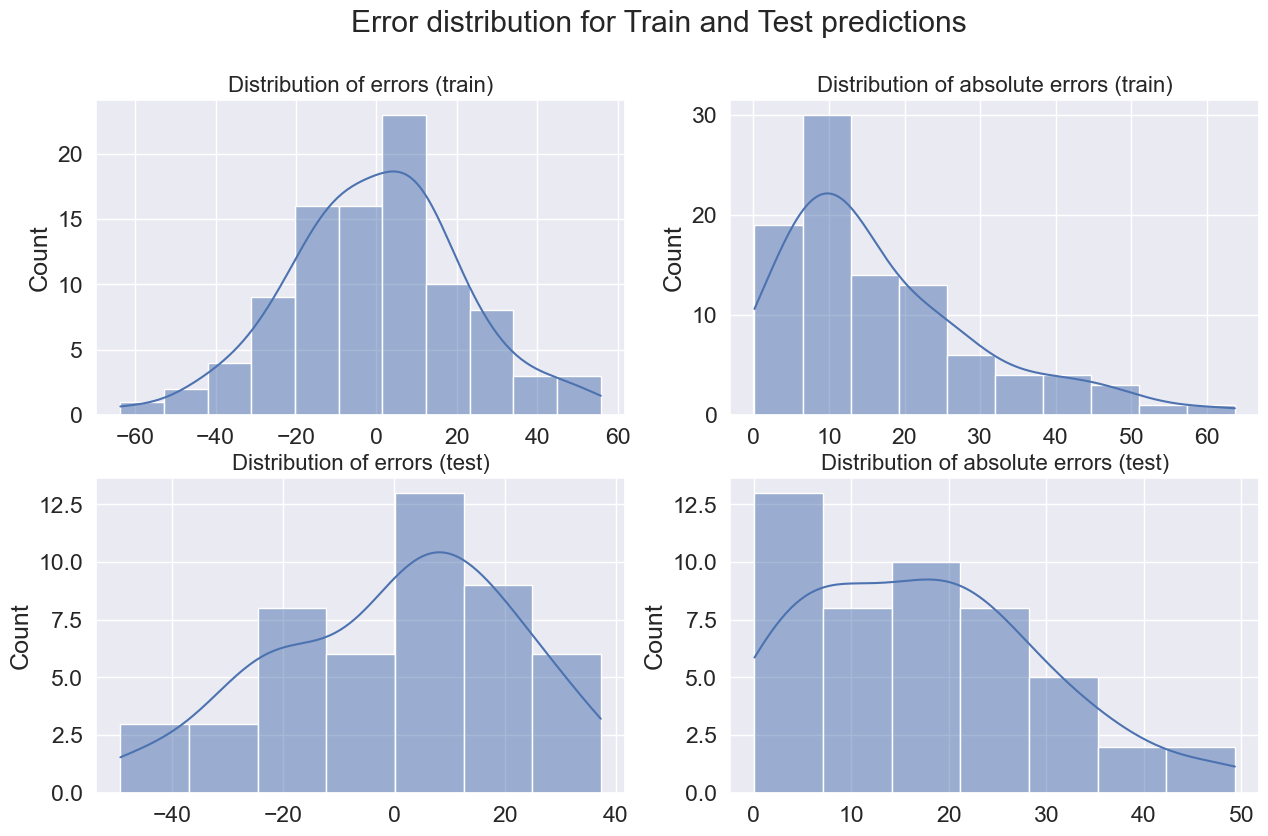

In [79]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Error distribution for Train and Test predictions')
sns.histplot(data = y_train - pred_train, ax = axes[0,0], kde = True).set_title("Distribution of errors (train)", size=16)
sns.histplot(data = np.abs(y_train - pred_train), ax= axes[0,1], kde = True).set_title("Distribution of absolute errors (train)", size=16)
sns.histplot(data = y_test - pred_test, ax = axes[1,0], kde = True).set_title("Distribution of errors (test)", size=16)
sns.histplot(data = np.abs(y_test - pred_test), ax=axes[1,1], kde = True).set_title("Distribution of absolute errors (test)", size=16)
plt.show()


There is a slight difference between the distributions, however our dataset does not have many data entries (143 on total) and only 33% of them are used in the test. I would expect the distribution to get similar shapes if more data entries were available.

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?**

Some considerations have already been given in the previous explanations. However I will add some more i noticed.

In the **Simple Linear Regression** case I found out that for every 1 year increase in *life_exp* a 5.1 increase in *happiness_score* was calculated. This value lowered down to 1.8 when for the same case we consider multiple predictors (**Multiple Linear Regression**) and at the same time also increased *R_squared*.
Having more than one predictor in this case is better for predicting the outcome for unknown data so it is better in generalizing the output.

Focusing on the multiple linear regression case, I found that according to the model, **happiness_score** and some predictors have inverse relationship (also noticeable from correlation matrix in step 6), namely with **social_support**, **freedom** and **generosity**, which are enough in order to provide a better prediction than with or just **life_exp**. This is does not make much sense in general as one would expect that the more people are supported and free, the happier they become. However I would start by attempting to remove the multicollinearity issue noticed and see how the coefficients and p-values become, after that I would try to extract other features or group the data on different levels.

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

16:39:26 - cmdstanpy - INFO - Chain [1] start processing
16:39:26 - cmdstanpy - INFO - Chain [1] done processing


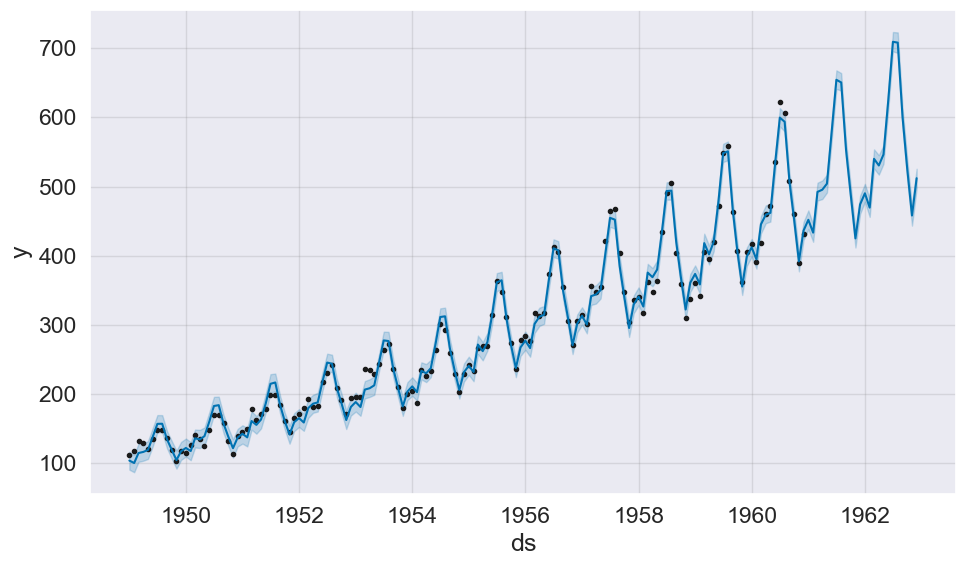

In [80]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_csv('data/air-passengers.csv')
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

Since the variability of the trend changes proportionally with the independent variable, it is better su use a **multiplicative decomposition** instead.